_______________
THE DATASET IS:
_______________

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Pr

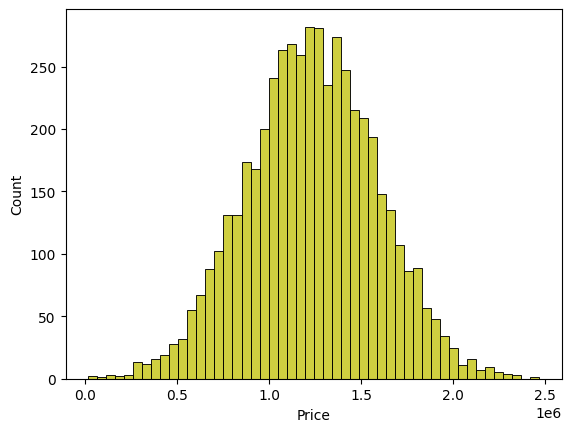


________
JOINTPLOT:
________


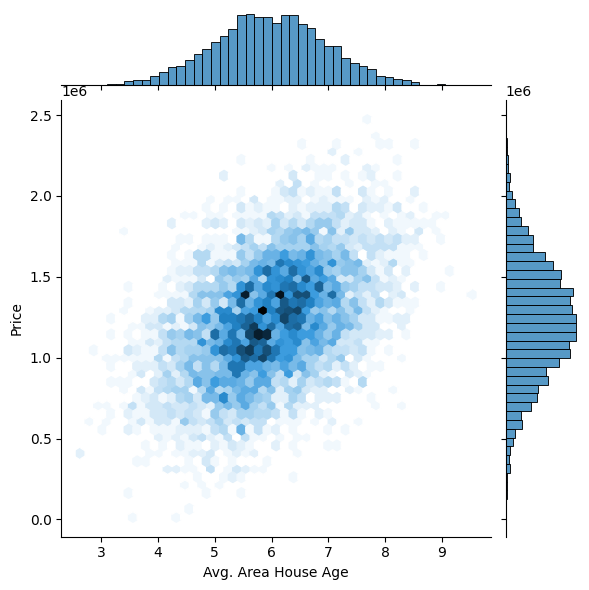

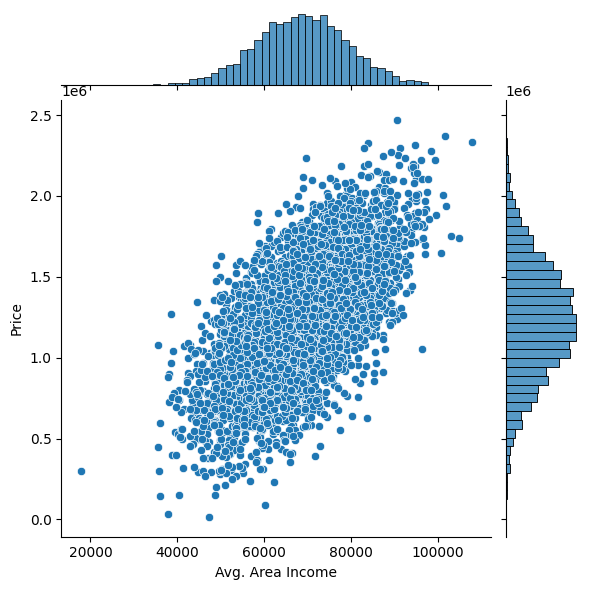


_________
HISTOGRAM
_________


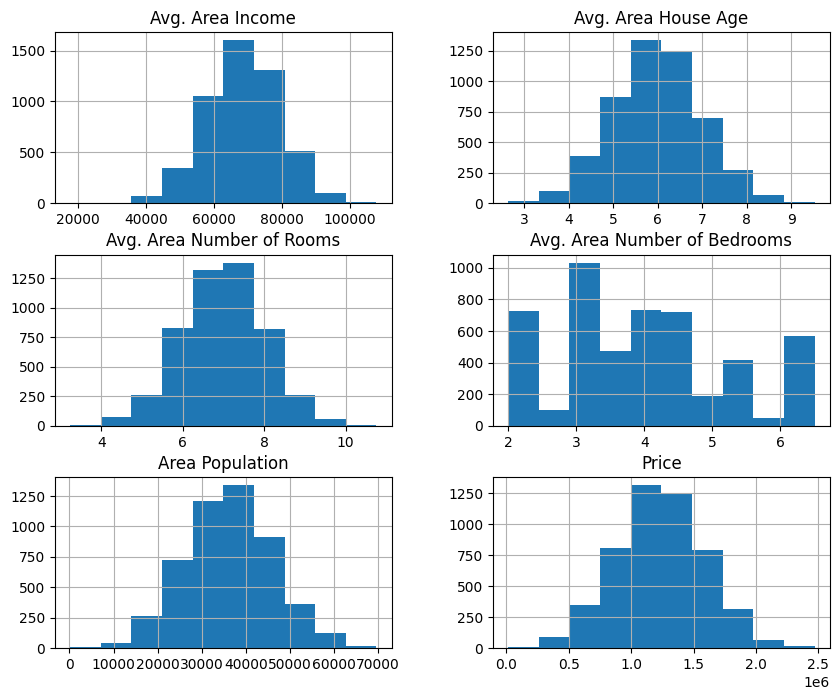

_________________
CORRELATING DATA:
_________________
                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg.

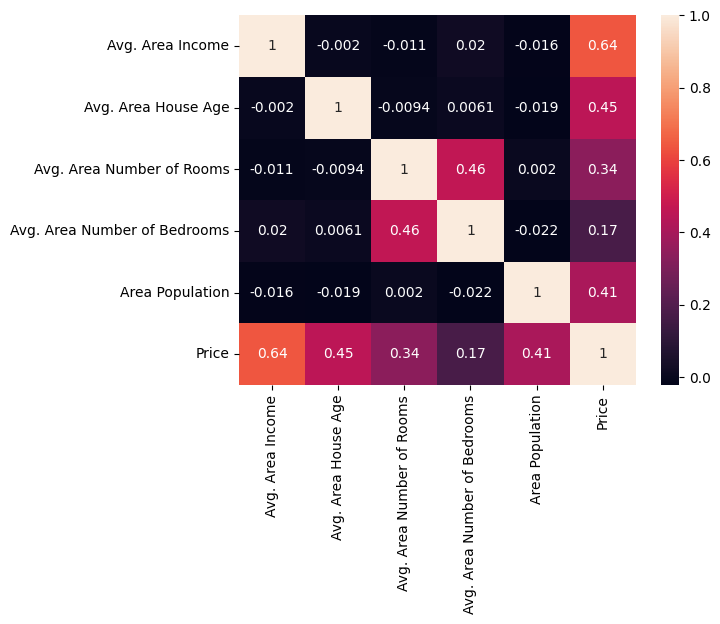



THE VALUE OF X IS:

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09 

c:\Users\amald\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Text(0.5, 1.0, 'ACTUAL VS PREDICTED DATA')

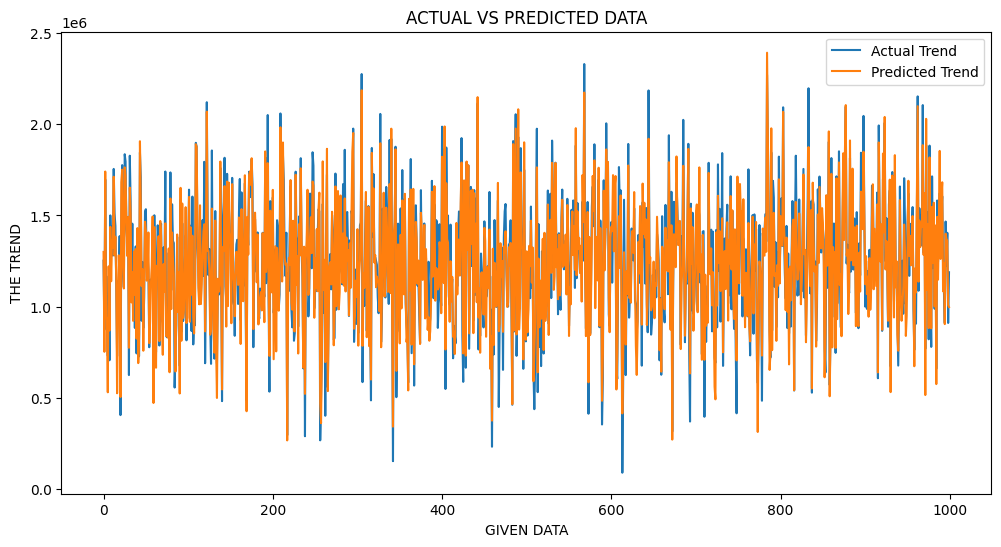

In [2]:
#IMPORTING THE LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xg

#IMPORTING & LOADING THE DATASET
print("_______________")
print("THE DATASET IS:")
print("_______________")
print()
dataset = pd.read_csv("C:/Users/amald/OneDrive/Desktop/jupyter/USA HOUSING.csv")
print(dataset)
print()
print()

#PREPROCESSING THE DATASET
print("_____________________________")
print("THE INFORMATION ABOUT DATASET:")
print("_____________________________")
print()
print(dataset.info())
print()
print("___________________")
print("DESCRIBING DATASET:")
print("___________________")
print()
print(dataset.describe())
print()
print("________________")
print("THE COLUMNS ARE:")
print("________________")
print()
print(dataset.columns)
print()
print("_________")
print("HISTPLOT:")
print("_________")
print()
m=sns.histplot(dataset, x='Price', bins=50, color='y')
plt.show()
print()
print("________")
print("JOINTPLOT:")
print("________")
sns.jointplot(dataset, x='Avg. Area House Age', y='Price', kind='hex')
sns.jointplot(dataset, x='Avg. Area Income', y='Price')
plt.show()
print()
print("_________")
print("HISTOGRAM")
print("_________")
dataset.hist(figsize=(10,8))
plt.show()
print("_________________")
print("CORRELATING DATA:")
print("_________________")
print(dataset.corr(numeric_only=True))
print()
print("________")
print("HEATMAP:")
print("________")
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()
print()

#DIVIDING DATASET INTO FEATURES AND TARGET
x = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataset['Price']
print()
print("THE VALUE OF X IS:")
print()
print(x)
print()
print("THE VALUE OF Y IS:")
print()
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
y_train.head()

#STANDARDIZING THE DATA
sc = StandardScaler()
X_train_scalar = sc.fit_transform(x_train)
X_test_scalar = sc.fit_transform(x_test)

#MODEL TRAINING
model_xg = xg.XGBRegressor()
model_xg.fit(X_train_scalar,y_train)
Prediction5 = model_xg.predict(X_test_scalar)

#EVALUATION
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), Prediction5, label='Predicted Trend')
plt.xlabel('GIVEN DATA')
plt.ylabel('THE TREND')
plt.legend()
plt.title('ACTUAL VS PREDICTED DATA')